<a href="https://colab.research.google.com/github/sauravsingla/General/blob/master/Credit_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libs

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sns
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import itertools
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from pandas import DataFrame
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import plotly.graph_objs as go
import plotly.offline as py 
from sklearn.ensemble import GradientBoostingClassifier
from plotly import tools

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
training_data= pd.read_excel("Study.xlsx")

In [ ]:
training_data.head(n=5)

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [ ]:
print("Data types and their frequency\n{}".format(training_data.dtypes.value_counts()))

Data types and their frequency
int64    14
dtype: int64


In [ ]:
cols = ['Status', 'Home', 'Marital', 'Records','Job' ]
for name in cols:
    print(name,':')
    print(training_data[name].value_counts(),'\n')

Status :
1    3200
2    1254
0       1
Name: Status, dtype: int64 

Home :
2    2107
1     973
5     783
6     319
3     247
4      20
0       6
Name: Home, dtype: int64 

Marital :
2    3241
1     978
4     130
3      67
5      38
0       1
Name: Marital, dtype: int64 

Records :
1    3682
2     773
Name: Records, dtype: int64 

Job :
1    2806
3    1024
2     452
4     171
0       2
Name: Job, dtype: int64 



In [ ]:
# Counting number of classes in the Status label

training_data['Status'].value_counts()

1    3200
2    1254
0       1
Name: Status, dtype: int64

In [ ]:
# Remove one row with Status value 0

training_data=training_data[training_data.Status != 0]

In [ ]:
training_data['Status'].value_counts()

1    3200
2    1254
Name: Status, dtype: int64

In [ ]:
# Number of oberservations in the dataset

len(training_data)

4454

In [ ]:
# Label encoding

lbl=preprocessing.LabelEncoder()
training_data['Records'] = lbl.fit_transform(training_data['Records'])
training_data['Status'] = lbl.fit_transform(training_data['Status'])

In [ ]:
#Looking unique values

cols = ['Status', 'Home', 'Marital', 'Records','Job' ]
for name in cols:
    print(name,':')
    print(training_data[name].value_counts(),'\n')

Status :
0    3200
1    1254
Name: Status, dtype: int64 

Home :
2    2107
1     973
5     783
6     319
3     246
4      20
0       6
Name: Home, dtype: int64 

Marital :
2    3241
1     977
4     130
3      67
5      38
0       1
Name: Marital, dtype: int64 

Records :
0    3681
1     773
Name: Records, dtype: int64 

Job :
1    2805
3    1024
2     452
4     171
0       2
Name: Job, dtype: int64 



In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4454 entries, 0 to 4454
Data columns (total 14 columns):
Status       4454 non-null int64
Seniority    4454 non-null int64
Home         4454 non-null int64
Time         4454 non-null int64
Age          4454 non-null int64
Marital      4454 non-null int64
Records      4454 non-null int64
Job          4454 non-null int64
Expenses     4454 non-null int64
Income       4454 non-null int64
Assets       4454 non-null int64
Debt         4454 non-null int64
Amount       4454 non-null int64
Price        4454 non-null int64
dtypes: int64(14)
memory usage: 522.0 KB


In [ ]:
training_data.describe(include=[np.number])

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
count,4454.000000,4454.000000,4454.000000,4454.000000,4454.000000,4454.000000,4454.000000,4454.000000,4454.000000,4.454000e+03,4.454000e+03,4.454000e+03,4454.000000,4454.000000
mean,0.281545,7.986753,2.656938,46.438707,37.080377,1.879210,0.173552,1.676022,55.573417,7.634883e+05,1.060578e+06,4.044728e+05,1038.918276,1462.780198
std,0.449803,8.174306,1.610640,14.655462,10.984598,0.643685,0.378766,0.954089,19.515634,8.704595e+06,1.021870e+07,6.344963e+06,474.545999,628.128120
min,0.000000,0.000000,0.000000,6.000000,18.000000,0.000000,0.000000,0.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,0.000000,2.000000,2.000000,36.000000,28.000000,2.000000,0.000000,1.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1117.250000
50%,0.000000,5.000000,2.000000,48.000000,36.000000,2.000000,0.000000,1.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,1.000000,12.000000,4.000000,60.000000,45.000000,2.000000,0.000000,3.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1691.500000
max,1.000000,48.000000,6.000000,72.000000,68.000000,5.000000,1.000000,4.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


In [ ]:
# Check for missing training_data

missing_training_data = training_data.isnull()
for column in missing_training_data.columns.values.tolist():
    if True in missing_training_data[column].value_counts().index.tolist():
        print(column)
        print (missing_training_data[column].value_counts())
        print("") 

count    4454.000000
mean       37.080377
std        10.984598
min        18.000000
25%        28.000000
50%        36.000000
75%        45.000000
max        68.000000
Name: Age, dtype: float64
0.0


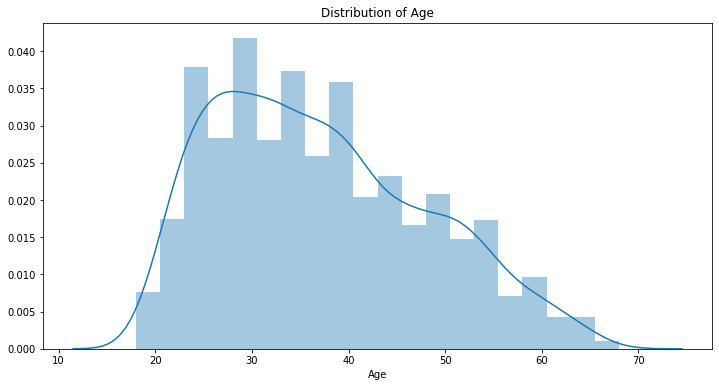

In [ ]:
# Distribution of Age

plt.figure(figsize=(12,6))

sns.distplot(training_data['Age'],bins=20)

plt.title("Distribution of Age")

print(training_data['Age'].describe())
print(sum(training_data['Age'] == 0)/float(len(training_data)))

In [ ]:
# Quartiles

print('1º Quartile: ', training_data['Age'].quantile(q = 0.25))
print('2º Quartile: ', training_data['Age'].quantile(q = 0.50))
print('3º Quartile: ', training_data['Age'].quantile(q = 0.75))
print('4º Quartile: ', training_data['Age'].quantile(q = 1.00))
   
print('Ages above: ', training_data['Age'].quantile(q = 0.75) + 
                      1.5*(training_data['Age'].quantile(q = 0.75) - training_data['Age'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  28.0
2º Quartile:  36.0
3º Quartile:  45.0
4º Quartile:  68.0
Ages above:  70.5 are outliers


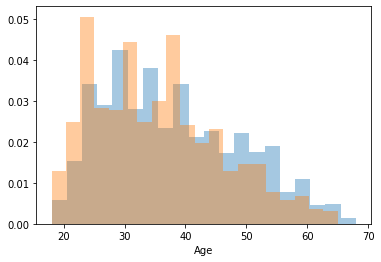

In [ ]:
sns.distplot(training_data.loc[training_data['Status'] == 0]['Age'],kde=False, norm_hist=True, bins=20)
sns.distplot(training_data.loc[training_data['Status'] == 1]['Age'],kde=False, norm_hist=True, bins=20)

In [ ]:
#Let's look the Amount column
import plotly.graph_objs as go
import plotly.offline as py 

interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
training_data["Age_cat"] = pd.cut(training_data.Age, interval, labels=cats)


df_good = training_data[training_data["Status"] == 0]
df_bad =training_data[training_data["Status"] == 1]

trace0 = go.Box(
    y=df_good["Amount"],
    x=df_good["Age_cat"],
    name='Good credit',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Box(
    y=df_bad['Amount'],
    x=df_bad['Age_cat'],
    name='Bad credit',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title=' Amount ',
        zeroline=False
    ),
    xaxis=dict(
        title='Age Categorical'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

count    4454.000000
mean       46.438707
std        14.655462
min         6.000000
25%        36.000000
50%        48.000000
75%        60.000000
max        72.000000
Name: Time, dtype: float64
0.0


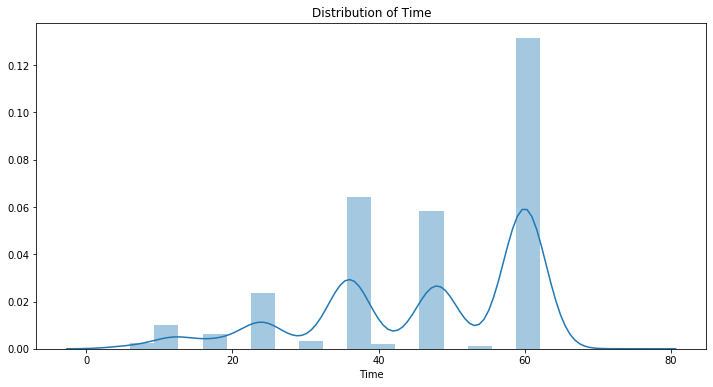

In [ ]:
# Distribution of Time

plt.figure(figsize=(12,6))

sns.distplot(training_data['Time'],bins=20)

plt.title("Distribution of Time")

print(training_data['Time'].describe())
print(sum(training_data['Time'] == 0)/float(len(training_data)))

In [ ]:
# Quartiles

print('1º Quartile: ', training_data['Time'].quantile(q = 0.25))
print('2º Quartile: ', training_data['Time'].quantile(q = 0.50))
print('3º Quartile: ', training_data['Time'].quantile(q = 0.75))
print('4º Quartile: ', training_data['Time'].quantile(q = 1.00))
   
print('Time above: ', training_data['Time'].quantile(q = 0.75) + 
                      1.5*(training_data['Time'].quantile(q = 0.75) - training_data['Time'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  36.0
2º Quartile:  48.0
3º Quartile:  60.0
4º Quartile:  72.0
Time above:  96.0 are outliers


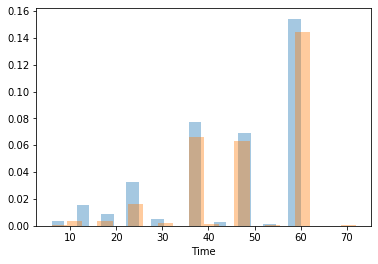

In [ ]:
sns.distplot(training_data.loc[training_data['Status'] == 0]['Time'],kde=False, norm_hist=True, bins=20)
sns.distplot(training_data.loc[training_data['Status'] == 1]['Time'],kde=False, norm_hist=True, bins=20)

count    4454.000000
mean        7.986753
std         8.174306
min         0.000000
25%         2.000000
50%         5.000000
75%        12.000000
max        48.000000
Name: Seniority, dtype: float64
0.1201167489896722


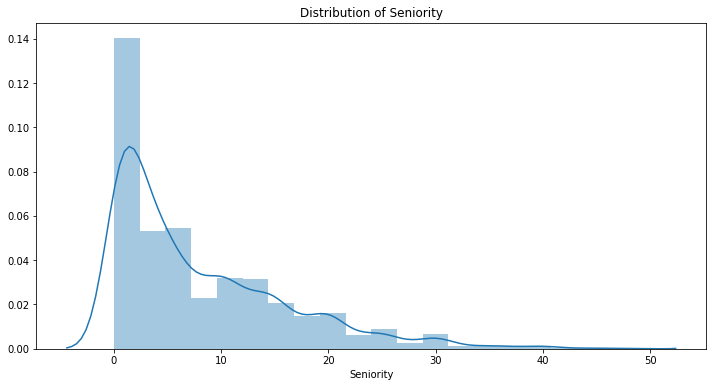

In [ ]:
# Distribution of Seniority

plt.figure(figsize=(12,6))

sns.distplot(training_data['Seniority'],bins=20)

plt.title("Distribution of Seniority")

print(training_data['Seniority'].describe())
print(sum(training_data['Seniority'] == 0)/float(len(training_data)))

In [ ]:
# Quartiles

print('1º Quartile: ', training_data['Seniority'].quantile(q = 0.25))
print('2º Quartile: ', training_data['Seniority'].quantile(q = 0.50))
print('3º Quartile: ', training_data['Seniority'].quantile(q = 0.75))
print('4º Quartile: ', training_data['Seniority'].quantile(q = 1.00))
   
print('Seniority above: ', training_data['Seniority'].quantile(q = 0.75) + 
                      1.5*(training_data['Seniority'].quantile(q = 0.75) - training_data['Seniority'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  2.0
2º Quartile:  5.0
3º Quartile:  12.0
4º Quartile:  48.0
Seniority above:  27.0 are outliers


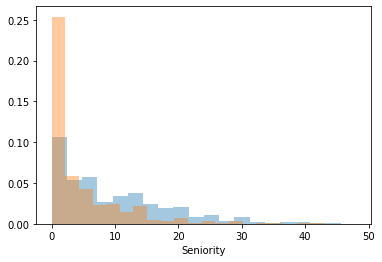

In [ ]:
sns.distplot(training_data.loc[training_data['Status'] == 0]['Seniority'],kde=False, norm_hist=True, bins=20)
sns.distplot(training_data.loc[training_data['Status'] == 1]['Seniority'],kde=False, norm_hist=True, bins=20)

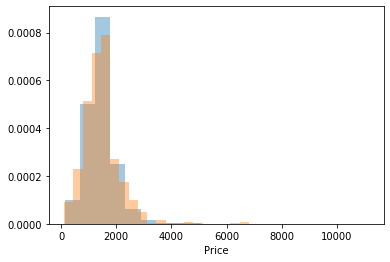

In [ ]:
sns.distplot(training_data.loc[training_data['Status'] == 0]['Price'],kde=False, norm_hist=True, bins=20)
sns.distplot(training_data.loc[training_data['Status'] == 1]['Price'],kde=False, norm_hist=True, bins=20)

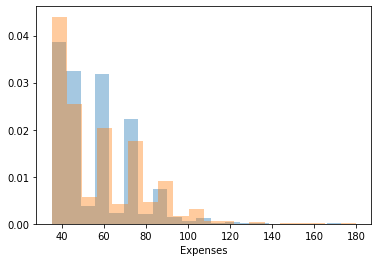

In [ ]:
sns.distplot(training_data.loc[training_data['Status'] == 0]['Expenses'],kde=False, norm_hist=True, bins=20)
sns.distplot(training_data.loc[training_data['Status'] == 1]['Expenses'],kde=False, norm_hist=True, bins=20)

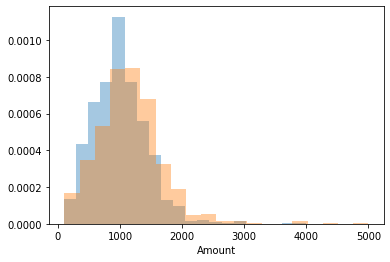

In [ ]:
sns.distplot(training_data.loc[training_data['Status'] == 0]['Amount'],kde=False, norm_hist=True, bins=20)
sns.distplot(training_data.loc[training_data['Status'] == 1]['Amount'],kde=False, norm_hist=True, bins=20)

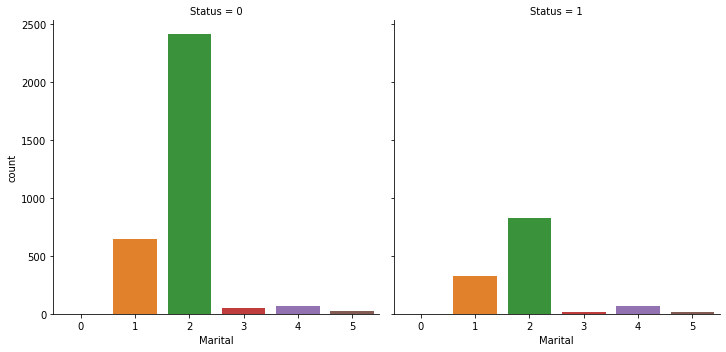

In [ ]:
sns.catplot(x='Marital',kind='count',col='Status',data=training_data)

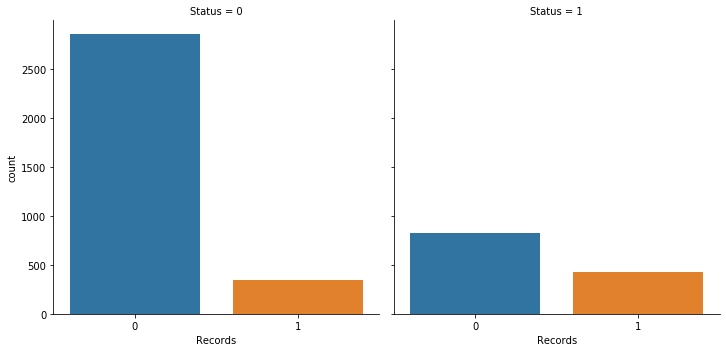

In [ ]:
sns.catplot(x='Records',kind='count',col='Status',data=training_data)

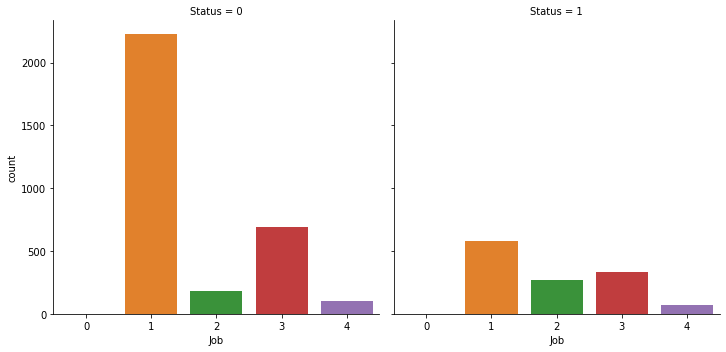

In [ ]:
sns.catplot(x='Job',kind='count',col='Status',data=training_data)

In [ ]:
fig = {
    "data": [
        {
            "type": 'violin',
            "x": df_good['Job'],
            "y": df_good['Amount'],
            "legendgroup": 'Good Credit',
            "scalegroup": 'No',
            "name": 'Good Credit',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'blue'
            }
        },
        {
            "type": 'violin',
            "x": df_bad['Job'],
            "y": df_bad['Amount'],
            "legendgroup": 'Bad Credit',
            "scalegroup": 'No',
            "name": 'Bad Credit',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'green'
            }
        }
    ],
    "layout" : {
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}


py.iplot(fig, filename = 'violin/split', validate = False)

Interesting! Highest values come from Job "3" and we have a different distribuition by Status

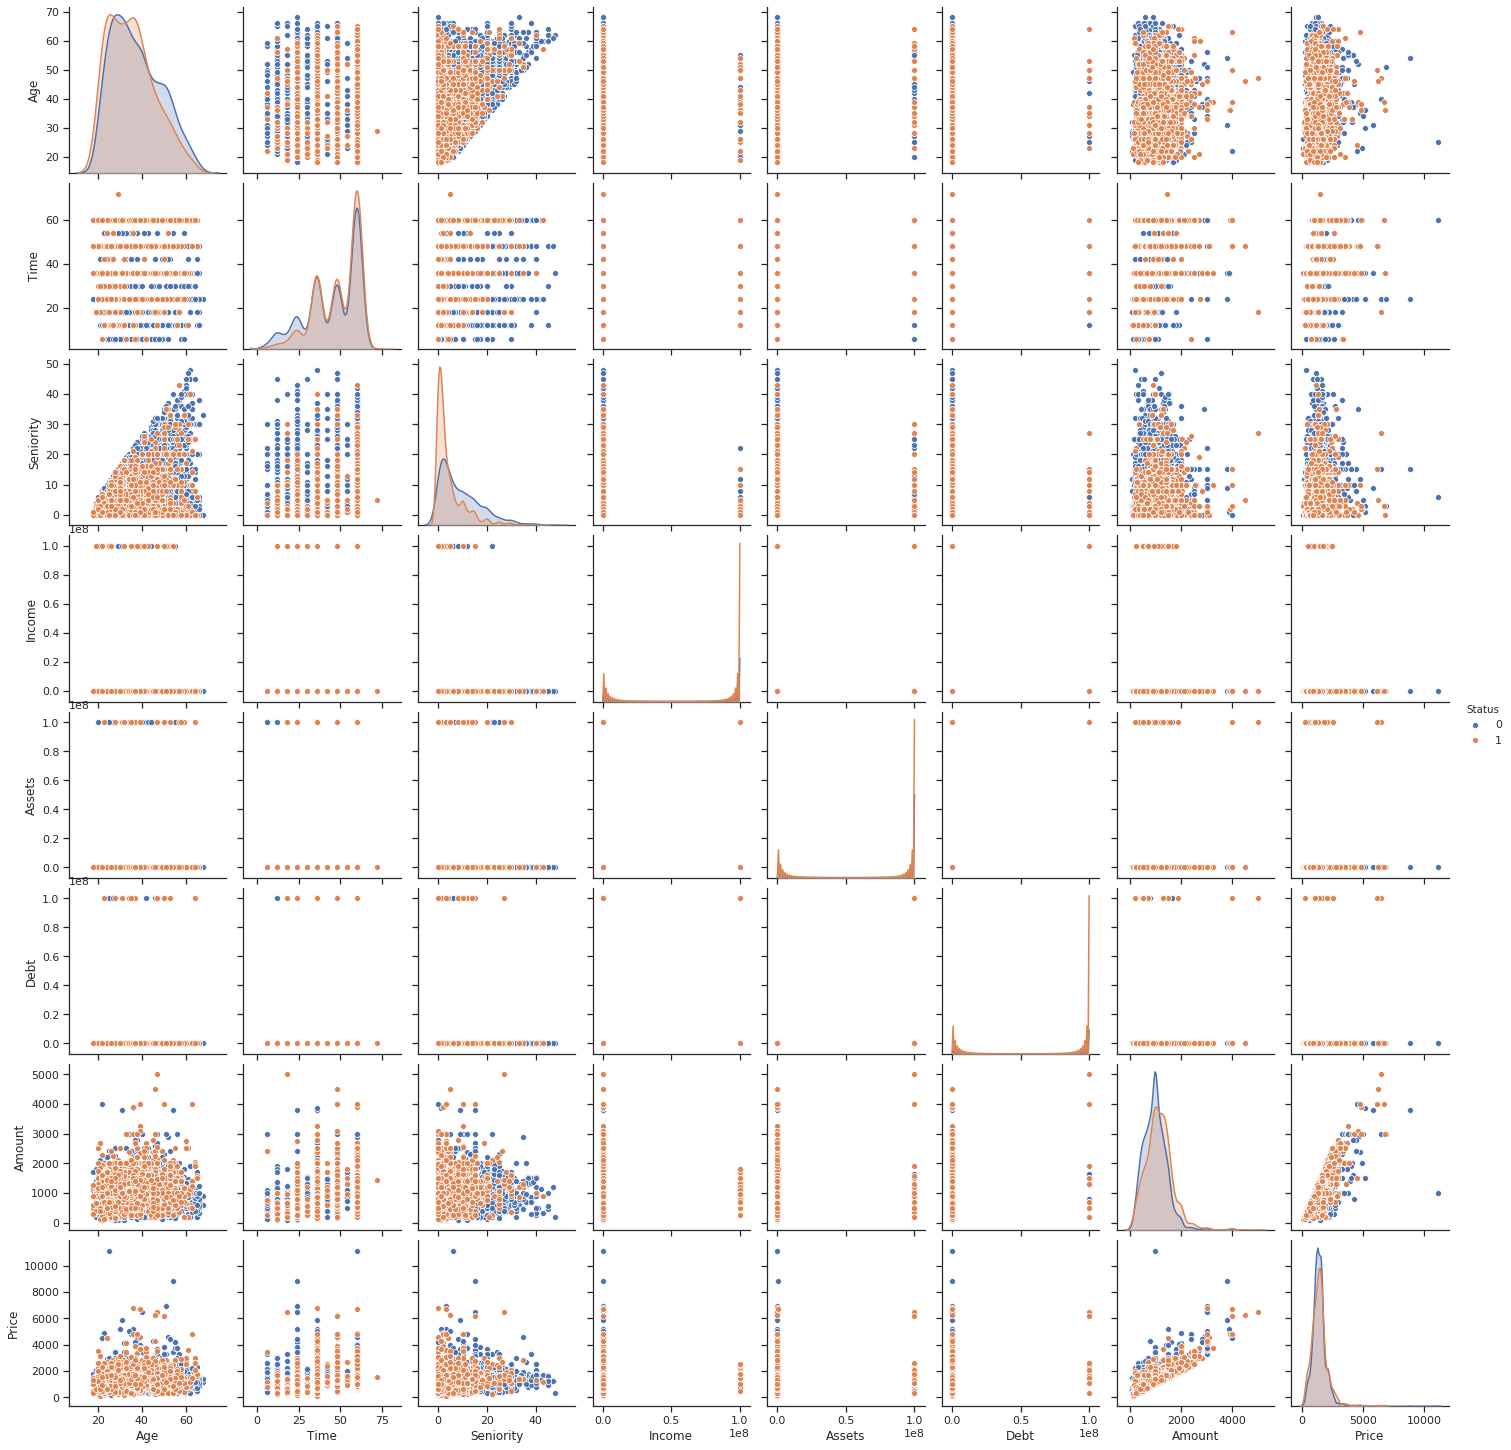

In [ ]:
sns.set(style = 'ticks', color_codes=True)
sns.pairplot(data=training_data, hue='Status',  
             vars=['Age', 'Time',  'Seniority', 'Income' ,'Assets',
                                          'Debt', 'Amount', 'Price'])

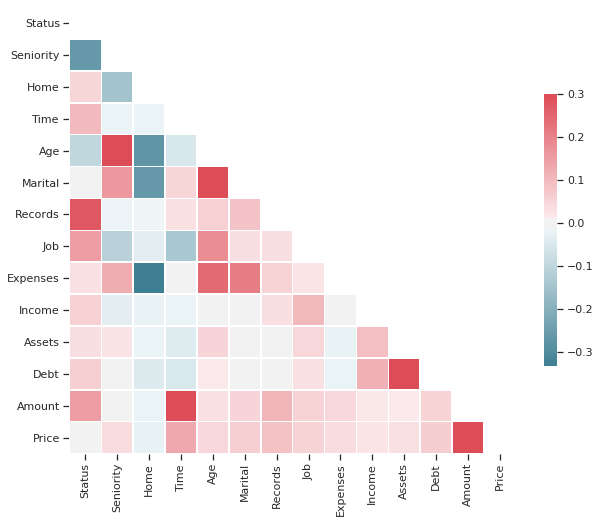

In [ ]:
# Correlation heatmap in between independent variables

corr = training_data.corr()

# Generate a mask for the upper triangle

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure

f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap

cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Some of this is not that surprising once you see it. For example, Age is positively correlated with Seniority and the Amount is positively correlated with the Time. Marital is positively correlated with the Age as well. Debt is positively correlated with the Assets as well. 

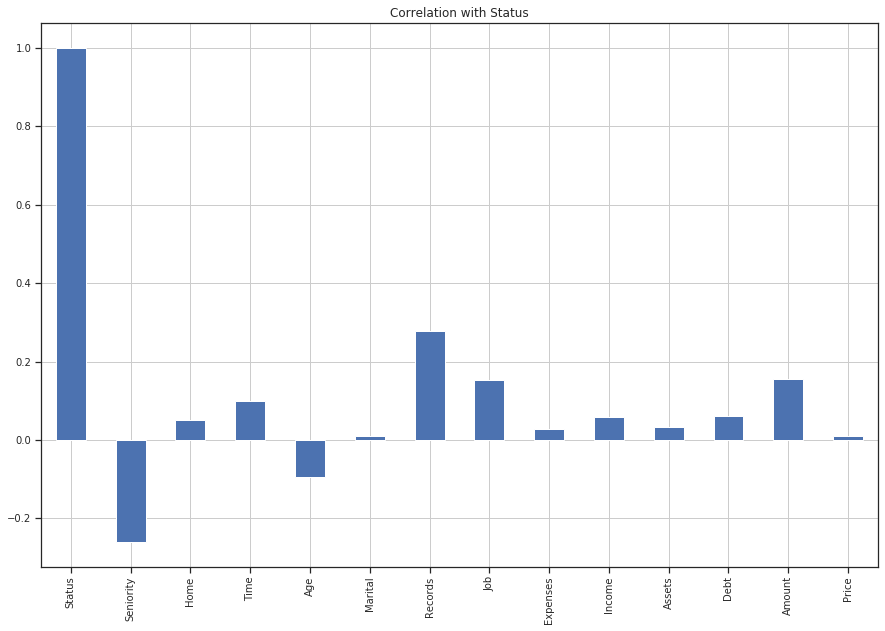

In [ ]:
#Correlation with Status variable

training_data.corrwith(training_data.Status).plot.bar(figsize = (15, 10), title = "Correlation with Status", fontsize = 10,grid = True)

In [ ]:
# Correlation with output variable

cor_target = abs(corr["Status"])

# Selecting highly correlated features

print("List the features decendingly by their correlation with Status:\n")

relevant_features = cor_target[cor_target>0.001]
relevant_features.sort_values(ascending=False)

List the features decendingly by their correlation with Status:



Status       1.000000
Records      0.278605
Seniority    0.260393
Amount       0.154549
Job          0.152416
Time         0.100627
Age          0.095301
Debt         0.062417
Income       0.059805
Home         0.051208
Assets       0.032953
Expenses     0.028855
Price        0.010740
Marital      0.009673
Name: Status, dtype: float64

The Status correlates strongly with Records, Seniority, Amount, Job, Time. But some of those features are highly correlated among each others.

Text(0, 0.5, 'Amount')

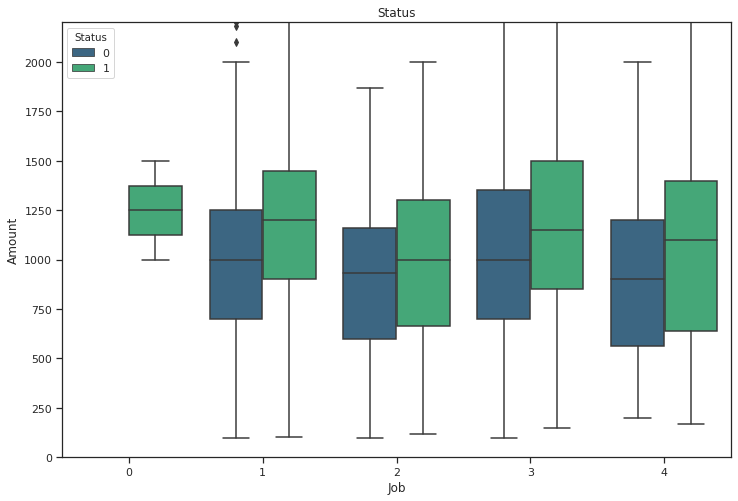

In [ ]:
plt.figure(figsize=(12,8))

sns.boxplot(x='Job',y='Amount',hue='Status',data=training_data,palette='viridis')

plt.ylim(0,2200)
plt.title("Status")
plt.ylabel("Amount")

Text(0, 0.5, 'Amount')

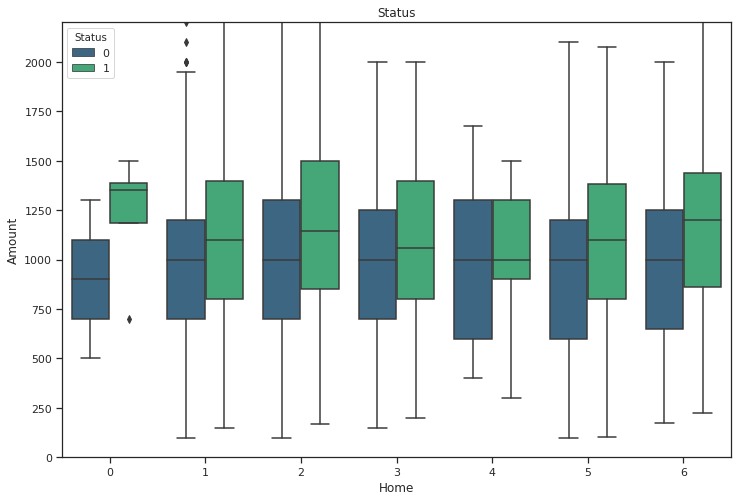

In [ ]:
plt.figure(figsize=(12,8))

sns.boxplot(x='Home',y='Amount',hue='Status',data=training_data,palette='viridis')

plt.ylim(0,2200)
plt.title("Status")
plt.ylabel("Amount")

In [ ]:
from plotly import tools
import numpy as np
import plotly.graph_objs as go

count_good = go.Bar(
    x = df_good["Home"].value_counts().index.values,
    y = df_good["Home"].value_counts().values,
    name='Good credit'
)
count_bad = go.Bar(
    x = df_bad["Home"].value_counts().index.values,
    y = df_bad["Home"].value_counts().values,
    name='Bad credit'
)


box_1 = go.Box(
    x=df_good["Home"],
    y=df_good["Amount"],
    name='Good credit'
)
box_2 = go.Box(
    x=df_bad["Home"],
    y=df_bad["Amount"],
    name='Bad credit'
)

scat_1 = go.Box(
    x=df_good["Home"],
    y=df_good["Age"],
    name='Good credit'
)
scat_2 = go.Box(
    x=df_bad["Home"],
    y=df_bad["Age"],
    name='Bad credit'
)

data = [scat_1, scat_2, box_1, box_2, count_good, count_bad]

fig = tools.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Count Home','Credit Amount by Home', 
                                          'Age by Home'))

fig.append_trace(count_good, 1, 1)
fig.append_trace(count_bad, 1, 1)

fig.append_trace(box_2, 1, 2)
fig.append_trace(box_1, 1, 2)

fig.append_trace(scat_1, 2, 1)
fig.append_trace(scat_2, 2, 1)



fig['layout'].update(height=700, width=800, title='Home Exploration', boxmode='group')

py.iplot(fig, filename='combined-Home')

/usr/local/lib/python3.6/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



*  Home catageory "0" age is between 20 and 50
*  Age of candidate above 35 and falling under home catageory "4" will be a good credit

Text(0, 0.5, 'Amount')

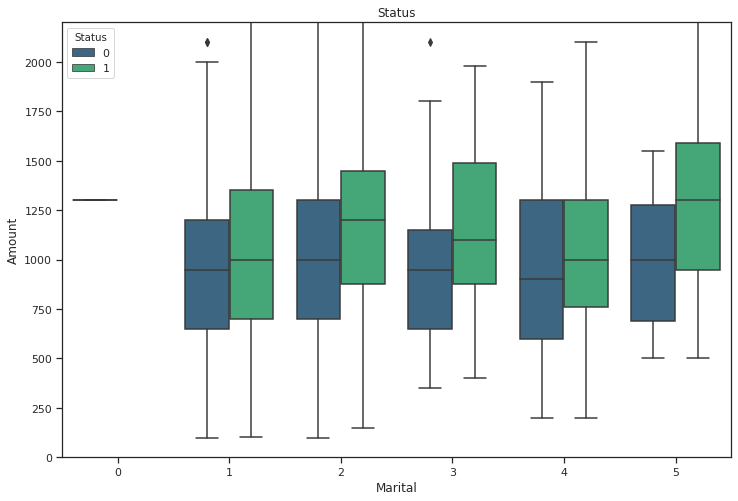

In [ ]:
plt.figure(figsize=(12,8))

sns.boxplot(x='Marital',y='Amount',hue='Status',data=training_data,palette='viridis')

plt.ylim(0,2200)
plt.title("Status")
plt.ylabel("Amount")

Description of Martial by Status:  
Status      0    1
Marital           
0           1    0
1         649  328
2        2412  829
3          48   19
4          66   64
5          24   14


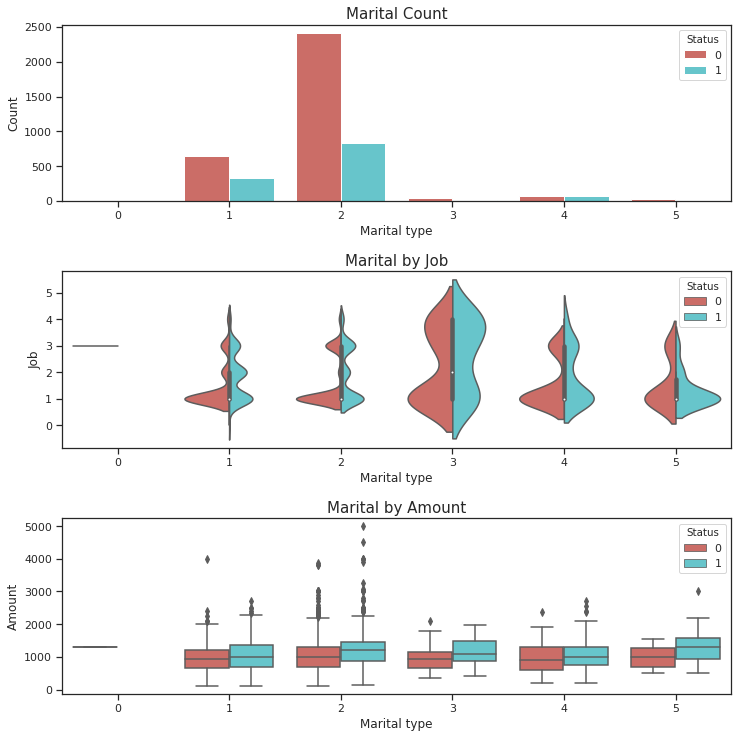

In [ ]:
print("Description of Martial by Status:  ")
print(pd.crosstab(training_data["Marital"],training_data.Status))

fig, ax = plt.subplots(3,1, figsize=(12,12))
g = sns.countplot(x="Marital", data=training_data, palette="hls", 
              ax=ax[0],hue="Status")
g.set_title("Marital Count", fontsize=15)
g.set_xlabel("Marital type", fontsize=12)
g.set_ylabel("Count", fontsize=12)

g1 = sns.violinplot(x="Marital", y="Job", data=training_data, palette="hls", 
               hue = "Status", ax=ax[1],split=True)
g1.set_title("Marital by Job", fontsize=15)
g1.set_xlabel("Marital type", fontsize=12)
g1.set_ylabel("Job", fontsize=12)

g2 = sns.boxplot(x="Marital", y="Amount", data=training_data, ax=ax[2],
            hue = "Status",palette="hls")
g2.set_title("Marital by Amount", fontsize=15)
g2.set_xlabel("Marital type", fontsize=12)
g2.set_ylabel("Amount", fontsize=12)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()

Marital "3" has maximum dispersion

In [ ]:
training_data.head(5)

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Age_cat
0,0,9,1,60,30,2,0,3,73,129,0,0,800,846,Young
1,0,17,1,60,58,3,0,1,48,131,0,0,1000,1658,Adult
2,1,10,2,36,46,2,1,3,90,200,3000,0,2000,2985,Adult
3,0,0,1,60,24,1,0,1,63,182,2500,0,900,1325,Student
4,0,0,1,36,26,1,0,1,46,107,0,0,310,910,Young


In [ ]:
cols = ['Debt', 'Assets' ]
for name in cols:
    print(name,':')
    print(training_data[name].value_counts(),'\n')

Debt :
0       3669
2000      59
1500      51
3000      46
1000      39
        ... 
3648       1
1641       1
39         1
1749       1
4090       1
Name: Debt, Length: 183, dtype: int64 

Assets :
0         1627
4000       343
5000       286
3000       270
3500       192
          ... 
54000        1
4900         1
29500        1
300000       1
86000        1
Name: Assets, Length: 160, dtype: int64 



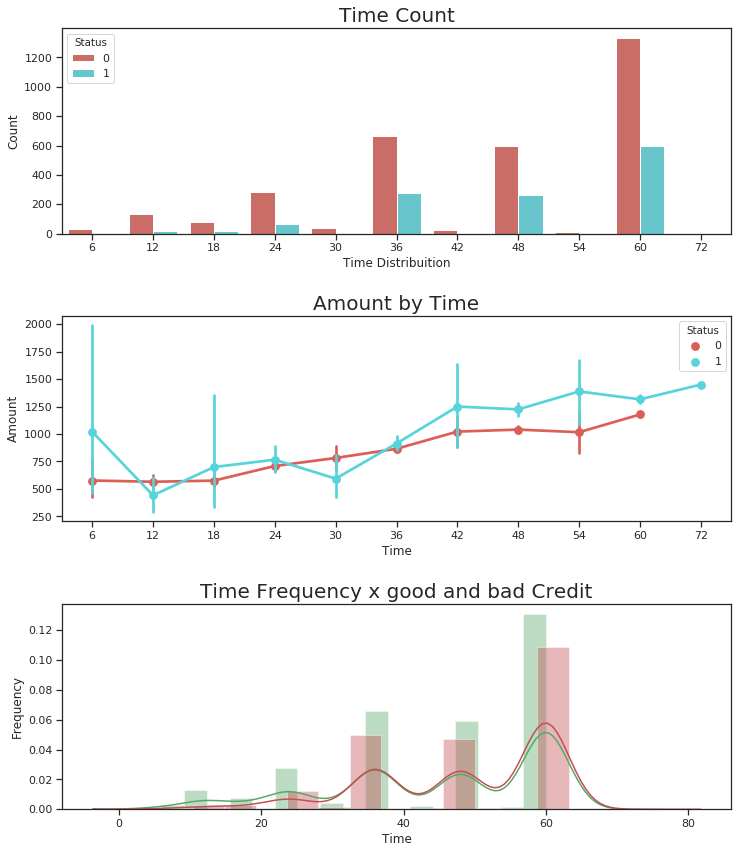

In [ ]:
plt.figure(figsize = (12,14))

g= plt.subplot(311)
g = sns.countplot(x="Time", data=training_data, 
              palette="hls",  hue = "Status")
g.set_xlabel("Time Distribuition", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Time Count", fontsize=20)

g1 = plt.subplot(312)
g1 = sns.pointplot(x="Time", y ="Amount",data=training_data,
                   hue="Status", palette="hls")
g1.set_xlabel("Time", fontsize=12)
g1.set_ylabel("Amount", fontsize=12)
g1.set_title("Amount by Time", fontsize=20)

g2 = plt.subplot(313)
g2 = sns.distplot(df_good["Time"], color='g')
g2 = sns.distplot(df_bad["Time"], color='r')
g2.set_xlabel("Time", fontsize=12)
g2.set_ylabel("Frequency", fontsize=12)
g2.set_title("Time Frequency x good and bad Credit", fontsize=20)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)

plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


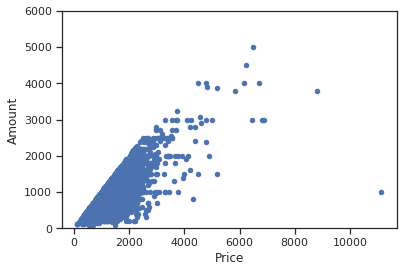

In [ ]:
#bivariate analysis Amount/Price

var = 'Price'
data = pd.concat([training_data['Amount'], training_data[var]], axis=1)
data.plot.scatter(x=var, y='Amount', ylim=(0,6000));

Price seem to be linearly related with Amount. Both relationships are positive, which means that as one variable increases, the other also increases.

**Conclusion:**

*   There are no missing values
*   List item



In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
training_data.head(5)

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Age_cat
0,0,9,1,60,30,2,0,3,73,129,0,0,800,846,Young
1,0,17,1,60,58,3,0,1,48,131,0,0,1000,1658,Adult
2,1,10,2,36,46,2,1,3,90,200,3000,0,2000,2985,Adult
3,0,0,1,60,24,1,0,1,63,182,2500,0,900,1325,Student
4,0,0,1,36,26,1,0,1,46,107,0,0,310,910,Young


In [ ]:
training_data.drop(["Age_cat"],axis = 1,inplace = True)

Lets check the performance by applying both Logistic Regression and Decision tree algorithms. Before applying the algorithms, The data is split into training and testing sets in the ratio 2:1 that is test data 33% and train data 67%.

In [ ]:
# removing the features Status from the input features set
x_basic = training_data.drop(columns=["Status"])
y = training_data["Status"]

# Spliting the data into test and train sets
x_basic_tr,x_basic_te,y_tr,y_te = train_test_split(x_basic,y,test_size =.33,random_state=1)
logreg_basic = LogisticRegression()

# Training the basic logistic regression model with training set 
logreg_basic.fit(x_basic_tr,y_tr)

# Printing the coefficients
print("intercept ")
print(logreg_basic.intercept_)
print("")
print("coefficients ")
print(logreg_basic.coef_)

# Predicting the output of the test cases using the algorithm created above
y_pre = logreg_basic.predict(x_basic_te)

# Validating the algorithm using various Performance metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("")
a1 = accuracy_score(y_te,y_pre)
f1 = f1_score(y_te, y_pre, average="macro")
p1 = precision_score(y_te, y_pre, average="macro")
r1 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a1)
print("f1 score : ",f1)
print("precision score : ",p1)
print("recall score : ",r1)

impFeatures = pd.DataFrame(logreg_basic.coef_[0] ,index=training_data.loc[:,training_data.columns!='Status'].columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
print (impFeatures)

intercept 
[-2.74214815e-07]

coefficients 
[[-3.41546824e-06 -6.76533357e-07 -1.18808653e-05 -1.08489125e-05
  -5.14089663e-07  1.02062691e-08 -3.84594495e-07 -1.49525845e-05
   1.23037237e-08 -7.22170786e-09  2.12450653e-08 -2.49858389e-04
  -4.08226332e-04]]

accuracy score :  0.7054421768707483
f1 score :  0.4267095989732274
precision score :  0.6861738535249828
recall score :  0.5054300569623622
             Importance
Debt       2.124507e-08
Income     1.230372e-08
Records    1.020627e-08
Assets    -7.221708e-09
Job       -3.845945e-07
Marital   -5.140897e-07
Home      -6.765334e-07
Seniority -3.415468e-06
Age       -1.084891e-05
Time      -1.188087e-05
Expenses  -1.495258e-05
Amount    -2.498584e-04
Price     -4.082263e-04


In [ ]:
dectree_basic = DecisionTreeClassifier()
dectree_basic.max_depth = 100
# Training the basic Decision Tree model with training set 
dectree_basic.fit(x_basic_tr,y_tr)

# Predicting the output of the test cases using the algorithm created above
y_pre = dectree_basic.predict(x_basic_te)

# Validating the algorithm using various Performance metrics

a2 = accuracy_score(y_te,y_pre)
f2 = f1_score(y_te, y_pre, average="macro")
p2 = precision_score(y_te, y_pre, average="macro")
r2 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a2)
print("f1 score : ",f2)
print("precision score : ",p2)
print("recall score : ",r2)

accuracy score :  0.7156462585034014
f1 score :  0.654599050240138
precision score :  0.6569273646183039
recall score :  0.6526249711639132


**Some discussion on Performance metrics :**
Generally Accuracy test can be used to evaluate algorithms. But in this case,just using the MAJORITY CLASS(0) to predict the output will give high(70%) accuracy.BUT WE WOULD END UP PREDICTING ALL "1" AS O's INSTEAD.
Hence other performance metrics must be used to evaluate the model.And those would be
F1 score : Weighted mean of Recall and Precision
Recall : (TP/TP+FN)
Precision : (TP/TP+FP) TP is true positive,FN is false negative,FP is false positive
Here we want to decrease the number of False Negatives i.e, We predict that credit will be repaid but it actually being a fraudant one.To decrease FN implies to increase Recall.Therefore, RECALL will the perfect Performance metric to evaluate this model.
Precsion may decrease in the process to increase recall but it is okay to predict some extra False Positives. ##### We can also RESAMPLE the data(We will get back to this at the end).

**Conclusions :**
Using Logistic Regression though Accuracy is good(70%), the model did not perform well on other performance metrics.Recal is just above .5 and this is not good.This may be due to overfitting and we will try to remove this in the next section.
Surprisingly,Decision Tree algorithm worked very well compared to Logistic Regression with a RECALL of about .64 and very good ACCURACY.This is beacause this model implicitly performs variable selection/feature selection by spliting the top nodes based on the most important features of the data and feature selection is done automatically.
Finally what I want say that is :
There will be a good improvement in Logistic Regression model after Feature Selection.
The results will almost stay same in the case of Decision Tree model even after Feature Selection.
We will prove the above hypothesis by creating models with selected features and compare them will the above models.

In [ ]:
training_data.head(5)

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,0,9,1,60,30,2,0,3,73,129,0,0,800,846
1,0,17,1,60,58,3,0,1,48,131,0,0,1000,1658
2,1,10,2,36,46,2,1,3,90,200,3000,0,2000,2985
3,0,0,1,60,24,1,0,1,63,182,2500,0,900,1325
4,0,0,1,36,26,1,0,1,46,107,0,0,310,910


**Feature transformation:**
Before Feature selection,As discussed in the section "Distribution of various Features" we need to transform some variables in order to improve predictability.


In [ ]:
cols = ['Status', 'Home', 'Marital', 'Records','Job' ]
for name in cols:
    print(name,':')
    print(training_data[name].value_counts(),'\n')

Status :
0    3200
1    1254
Name: Status, dtype: int64 

Home :
2    2107
1     973
5     783
6     319
3     246
4      20
0       6
Name: Home, dtype: int64 

Marital :
2    3241
1     977
4     130
3      67
5      38
0       1
Name: Marital, dtype: int64 

Records :
0    3681
1     773
Name: Records, dtype: int64 

Job :
1    2805
3    1024
2     452
4     171
0       2
Name: Job, dtype: int64 



In [ ]:
# We need to conert the nominal features records, job, marital, home into usable form and remove them from the data table

training_data["Records_1"] = (training_data["Records"] == 0)*1
training_data["Records_2"] = (training_data["Records"] == 1)*1
training_data["Job_1"] = (training_data["Job"]==0)*1
training_data["Job_2"] = (training_data["Job"]==1)*1
training_data["Job_3"] = (training_data["Job"]==2)*1
training_data["Job_4"] = (training_data["Job"]==3)*1
training_data["Job_5"] = (training_data["Job"]==4)*1
training_data["Home_1"] = (training_data["Home"]==0)*1
training_data["Home_2"] = (training_data["Home"]==1)*1
training_data["Home_3"] = (training_data["Home"]==2)*1
training_data["Home_4"] = (training_data["Home"]==3)*1
training_data["Home_5"] = (training_data["Home"]==4)*1
training_data["Home_6"] = (training_data["Home"]==5)*1
training_data["Home_7"] = (training_data["Home"]==6)*1
training_data["Marital_1"] = (training_data["Marital"]==0)*1
training_data["Marital_2"] = (training_data["Marital"]==1)*1
training_data["Marital_3"] = (training_data["Marital"]==2)*1
training_data["Marital_4"] = (training_data["Marital"]==3)*1
training_data["Marital_5"] = (training_data["Marital"]==4)*1
training_data["Marital_6"] = (training_data["Marital"]==5)*1

training_data.drop(["Job","Records", "Home", "Marital"],axis = 1,inplace = True)

# The above assignment creates new features for each records, job, marital, home 

In [ ]:
# We need to decrease the skewness of the feature Time,For that we can apply log of Time but since some of them are 0, we will use log(YOJ+constant)

training_data["Time"] = training_data["Time"].apply(lambda t : np.log(t+1))

In [ ]:
#function to creat group of ages

def age(dataframe):
    dataframe.loc[dataframe['Age'] <= 30, 'Age'] = 0
    dataframe.loc[(dataframe['Age'] > 30) & (dataframe['Age'] <= 45), 'Age'] = 1
    dataframe.loc[(dataframe['Age'] > 45) & (dataframe['Age'] <= 60), 'Age'] = 2
    dataframe.loc[(dataframe['Age'] > 60) , 'Age'] = 3
           
    return dataframe

age(training_data)

,Status,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price,Records_1,Records_2,Job_1,Job_2,Job_3,Job_4,Job_5,Home_1,Home_2,Home_3,Home_4,Home_5,Home_6,Home_7,Marital_1,Marital_2,Marital_3,Marital_4,Marital_5,Marital_6
0,0,9,4.110874,0,73,129,0,0,800,846,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,0,17,4.110874,2,48,131,0,0,1000,1658,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,10,3.610918,2,90,200,3000,0,2000,2985,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,4.110874,0,63,182,2500,0,900,1325,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,3.610918,0,46,107,0,0,310,910,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,1,1,4.110874,1,69,92,0,0,900,1020,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4451,0,22,4.110874,2,60,75,3000,600,950,1263,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4452,1,0,3.218876,1,60,90,3500,0,500,963,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4453,0,0,3.891820,0,49,140,0,0,550,550,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
training_data.head(5)

,Status,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price,Records_1,Records_2,Job_1,Job_2,Job_3,Job_4,Job_5,Home_1,Home_2,Home_3,Home_4,Home_5,Home_6,Home_7,Marital_1,Marital_2,Marital_3,Marital_4,Marital_5,Marital_6
0,0,9,4.110874,0,73,129,0,0,800,846,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,0,17,4.110874,2,48,131,0,0,1000,1658,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,10,3.610918,2,90,200,3000,0,2000,2985,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,4.110874,0,63,182,2500,0,900,1325,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,3.610918,0,46,107,0,0,310,910,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


**Important Features**

In [ ]:
# Automatic feature selection using Recursive Feature Elimination wrapper method

X = training_data.drop(columns=["Status"])
y = training_data["Status"]

logreg = LogisticRegression()

selector = RFE(logreg)

selector = selector.fit(X,y)

# the best features according to RFE have a ranking of 1, so we'll create a second model with those features.

selected_features = DataFrame({'Feature':list(X.columns),'Ranking':selector.ranking_})
selected_features.sort_values(by='Ranking')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,Feature,Ranking
0,Seniority,1
25,Marital_3,1
24,Marital_2,1
21,Home_6,1
18,Home_3,1
17,Home_2,1
12,Job_2,1
9,Records_1,1
14,Job_4,1
7,Amount,1


RFE - Recursive Feature Elimination suggested Seniority, Time, Age as important variables

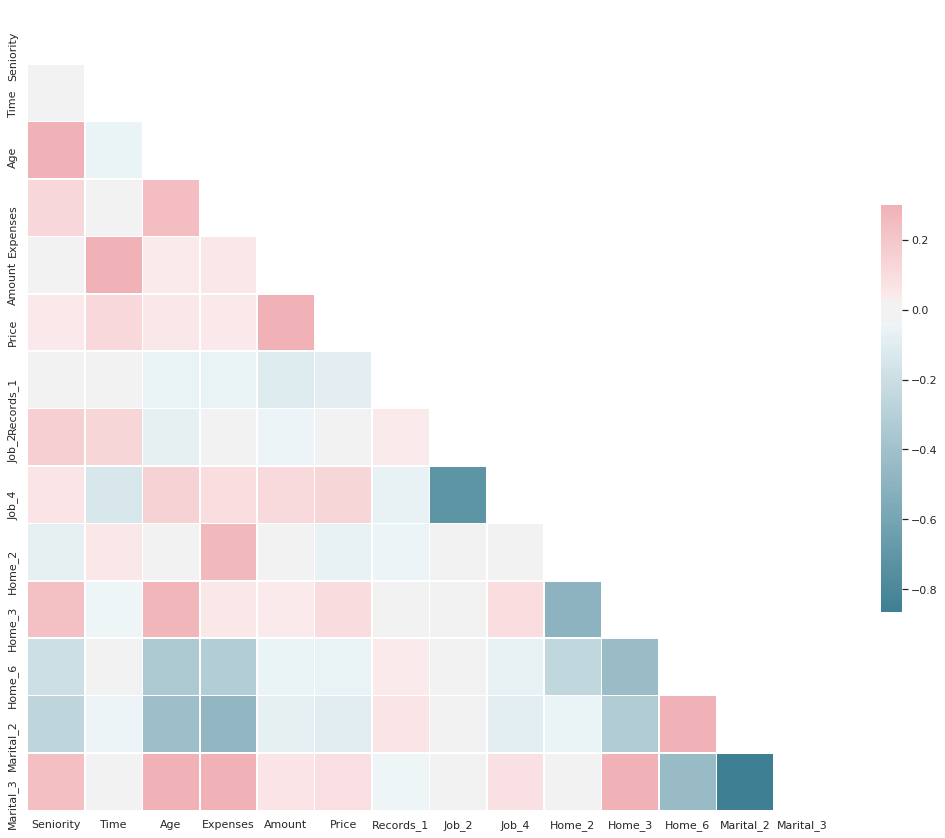

In [ ]:
sns.set(style="white")

# Compute the correlation matrix
corr = X[X.columns[selector.support_]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) 

**Feature selection:**
As we completed the transformation part, now we move on to Feature Selection.Now we will find out the most import features that are affecting the target variable "Status" the most.
We will use the following for this purpose :



*   chi square test
*   f_regression
*   f_classif






In [ ]:
# Using chi2 test for feature selection
# Finding the best 10 features using chi2 test

df_new = pd.DataFrame(SelectKBest(chi2, k=10).fit_transform(training_data.drop(["Status"],axis = 1),training_data["Status"]))
df_new.head()

,0,1,2,3,4,5,6,7,8,9
0,9.0,129.0,0.0,0.0,800.0,846.0,0.0,0.0,0.0,0.0
1,17.0,131.0,0.0,0.0,1000.0,1658.0,0.0,1.0,0.0,0.0
2,10.0,200.0,3000.0,0.0,2000.0,2985.0,1.0,0.0,0.0,1.0
3,0.0,182.0,2500.0,0.0,900.0,1325.0,0.0,1.0,0.0,0.0
4,0.0,107.0,0.0,0.0,310.0,910.0,0.0,1.0,0.0,0.0


In [ ]:
# Running the logistic regression algorithm using the features selected from chi2 test

x = df_new
y = training_data["Status"]
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = .33,random_state=1)
logreg = LogisticRegression()
logreg.fit(x_tr,y_tr)
y_pre = logreg.predict(x_te)
y_pre = logreg.predict(x_te)
a5 = accuracy_score(y_te,y_pre)
f5 = f1_score(y_te, y_pre, average="macro")
p5 = precision_score(y_te, y_pre, average="macro")
r5 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a5)
print("f1 score : ",f5)
print("precision score : ",p5)
print("recall score : ",r5)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

accuracy score :  0.7054421768707483
f1 score :  0.4267095989732274
precision score :  0.6861738535249828
recall score :  0.5054300569623622


In [ ]:
# Decision Tree classifier using features from chi2 test

clf_tree=DecisionTreeClassifier()
clf_tree.max_depth = 100
clf_tree.fit(x_tr,y_tr)
y_pre = clf_tree.predict(x_te)
a6 = accuracy_score(y_te,y_pre)
f6 = f1_score(y_te, y_pre, average="macro")
p6 = precision_score(y_te, y_pre, average="macro")
r6 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a6)
print("f1 score : ",f6)
print("precision score : ",p6)
print("recall score : ",r6)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

accuracy score :  0.7040816326530612
f1 score :  0.6417909946104796
precision score :  0.6433488289944728
recall score :  0.6404250882827889


In [ ]:
# Using f_classif for feature selection

df_new2 = pd.DataFrame(SelectKBest(f_classif, k=10).fit_transform(training_data.drop(["Status"],axis=1),training_data["Status"]))
df_new2.head()

,0,1,2,3,4,5,6,7,8,9
0,9.0,4.110874,800.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,17.0,4.110874,1000.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,10.0,3.610918,2000.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,4.110874,900.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,3.610918,310.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
# Running the logistic regression algorithm using the features selected from f_classif test

x = df_new2
y = training_data["Status"]
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = .33,random_state=1)
logreg = LogisticRegression()
logreg.fit(x_tr,y_tr)
y_pre = logreg.predict(x_te)
a7 = accuracy_score(y_te,y_pre)
f7 = f1_score(y_te, y_pre, average="macro")
p7 = precision_score(y_te, y_pre, average="macro")
r7 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a7)
print("f1 score : ",f7)
print("precision score : ",p7)
print("recall score : ",r7)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

accuracy score :  0.7700680272108843
f1 score :  0.6855825891501124
precision score :  0.7353155995286261
recall score :  0.6700863308075878


In [ ]:
# Decision Tree classifier using features from f_classif test

clf_tree=DecisionTreeClassifier()
clf_tree.max_depth = 100
clf_tree.fit(x_tr,y_tr)
y_pre = clf_tree.predict(x_te)
a8 = accuracy_score(y_te,y_pre)
f8 = f1_score(y_te, y_pre, average="macro")
p8 = precision_score(y_te, y_pre, average="macro")
r8 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a8)
print("f1 score : ",f8)
print("precision score : ",p8)
print("recall score : ",r8)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

accuracy score :  0.6925170068027211
f1 score :  0.6295627274673518
precision score :  0.6302895223061331
recall score :  0.6288884353982929


In [ ]:
# Using f_regression for feature selection

df_new3 = pd.DataFrame(SelectKBest(f_regression, k=10).fit_transform(training_data.drop(["Status"],axis=1),training_data["Status"]))
df_new3.head()

,0,1,2,3,4,5,6,7,8,9
0,9.0,4.110874,800.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,17.0,4.110874,1000.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,10.0,3.610918,2000.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,4.110874,900.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,3.610918,310.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
# Running the logistic regression algorithm using the features selected from f_regression test

x = df_new3
y = training_data["Status"]
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = .33,random_state=1)
logreg = LogisticRegression()
logreg.fit(x_tr,y_tr)
y_pre2 = logreg.predict(x_te)
a9 = accuracy_score(y_te,y_pre2)
f9 = f1_score(y_te, y_pre2, average="macro")
p9 = precision_score(y_te, y_pre2, average="macro")
r9 = recall_score(y_te, y_pre2, average="macro")
print("accuracy score : ",a9)
print("f1 score : ",f9)
print("precision score : ",p9)
print("recall score : ",r9)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

accuracy score :  0.7700680272108843
f1 score :  0.6855825891501124
precision score :  0.7353155995286261
recall score :  0.6700863308075878


In [ ]:
# Decision Tree classifier using features from f_regression test

clf_tree=DecisionTreeClassifier()
clf_tree.max_depth = 100
clf_tree.fit(x_tr,y_tr)
y_pre = clf_tree.predict(x_te)
a10 = accuracy_score(y_te,y_pre)
f10 = f1_score(y_te, y_pre, average="macro")
p10= precision_score(y_te, y_pre, average="macro")
r10 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a10)
print("f1 score : ",f10)
print("precision score : ",p10)
print("recall score : ",r10)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

accuracy score :  0.6850340136054421
f1 score :  0.6228243864890433
precision score :  0.6227435143690702
recall score :  0.6229060564654942


**Comparing all the models:**
We can now rank our evaluation of all the models to choose the best one for our problem.

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree','Logistic Regression', 'Decision Tree','Logistic Regression', 'Decision Tree','Logistic Regression', 'Decision Tree'],
    'Feature Selection Method' : ['None','None','chi2 test','chi2 test','f_classif','f_classif','f_regression','f_regression'],
    'Accuracy Score': [a1,a2,a5,a6,a7,a8,a9,a10],
    'Recall Score' : [r1,r2, r5,r6,r7,r8,r9,r10],
    'F1 Score' : [f1,f2,f5,f6,f7,f8,f9,f10],
    'Precision Score' : [p1,p2, p5,p6,p7,p8,p9,p10]
})

In [ ]:
models

,Model,Feature Selection Method,Accuracy Score,Recall Score,F1 Score,Precision Score
0,Logistic Regression,None,0.705442,0.505430,0.426710,0.686174
1,Decision Tree,None,0.715646,0.652625,0.654599,0.656927
2,Logistic Regression,chi2 test,0.705442,0.505430,0.426710,0.686174
3,Decision Tree,chi2 test,0.704082,0.640425,0.641791,0.643349
4,Logistic Regression,f_classif,0.770068,0.670086,0.685583,0.735316
5,Decision Tree,f_classif,0.692517,0.628888,0.629563,0.630290
6,Logistic Regression,f_regression,0.770068,0.670086,0.685583,0.735316
7,Decision Tree,f_regression,0.685034,0.622906,0.622824,0.622744


In [ ]:
pd.pivot_table(models,index = ["Feature Selection Method","Model"])

Accuracy Score  ...  Recall Score
Feature Selection Method Model                                ...              
None                     Decision Tree              0.715646  ...      0.652625
                         Logistic Regression        0.705442  ...      0.505430
chi2 test                Decision Tree              0.704082  ...      0.640425
                         Logistic Regression        0.705442  ...      0.505430
f_classif                Decision Tree              0.692517  ...      0.628888
                         Logistic Regression        0.770068  ...      0.670086
f_regression             Decision Tree              0.685034  ...      0.622906
                         Logistic Regression        0.770068  ...      0.670086

[8 rows x 4 columns]

**Discussion and Insights :**
Logistics regression Tree produced results with a good accuracy but overall performance is not that good.
Logistics regression dominated over Decision Tree in all cases.
As mentioned earlier, the performance of Decision tree remained almost the same from the start since it does feature selection inheritly.
Finally Logistics Regression model with feature selector f_classif & f_regression would be the best method to use because it has the Highest RECALL value of 67%
The maximum depth of the decision tree is set to 100 in all cases hence number of levels is 101 in all cases.And since we did not set the minimum number of observations in the leaf will be 1 since it is classification problem.
The threshold is defaultly set to .5 in Logistic Regression!
Obviously,changing the threshold affects the performance of the model and this can be observed in the next section.
This can be further extended by Resampling of the data to increase the RECALL score

Recall metric in the testing dataset:  0.9472477064220184
Accuracy score for the testing dataset:  0.49115646258503404
Confusion matrix, without normalization
[[309 725]
 [ 23 413]]

Recall metric in the testing dataset:  0.8119266055045872
Accuracy score for the testing dataset:  0.6414965986394557
Confusion matrix, without normalization
[[589 445]
 [ 82 354]]

Recall metric in the testing dataset:  0.658256880733945
Accuracy score for the testing dataset:  0.7258503401360544
Confusion matrix, without normalization
[[780 254]
 [149 287]]

Recall metric in the testing dataset:  0.536697247706422
Accuracy score for the testing dataset:  0.7612244897959184
Confusion matrix, without normalization
[[885 149]
 [202 234]]

Recall metric in the testing dataset:  0.4243119266055046
Accuracy score for the testing dataset:  0.7700680272108843
Confusion matrix, without normalization
[[947  87]
 [251 185]]

Recall metric in the testing dataset:  0.3211009174311927
Accuracy score for the testing da

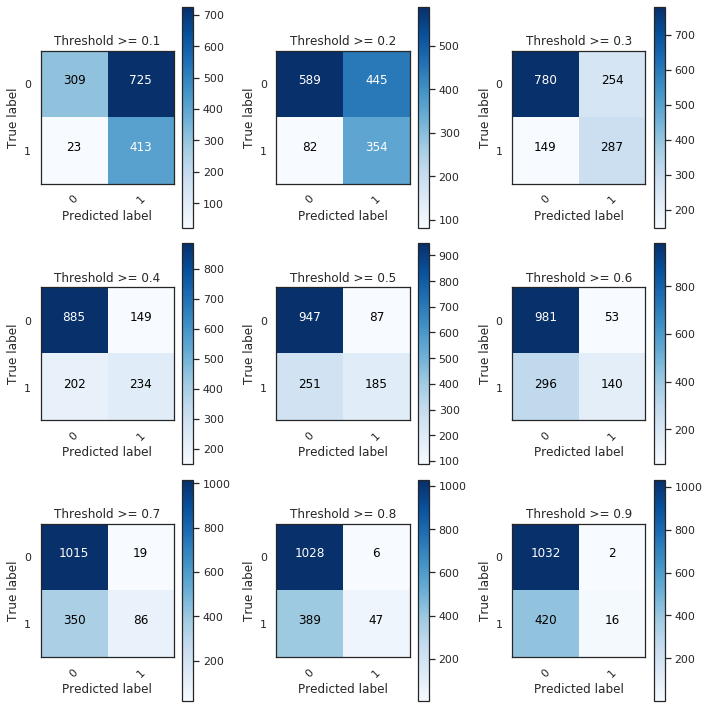

In [ ]:
# Changing the threshold and observing the performance

lr = LogisticRegression()
lr.fit(x_tr,y_tr)
y_pred_proba = lr.predict_proba(x_te)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_proba[:,1] >= i
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    
    cnf_matrix = confusion_matrix(y_te,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
    rec1 = recall_score(y_te, y_test_predictions_high_recall)
    acc= 1.0*(cnf_matrix[0,0]+cnf_matrix[1,1])/(cnf_matrix[0,0]+cnf_matrix[1,0]+cnf_matrix[1,1]+cnf_matrix[0,1])
    print("Recall metric in the testing dataset: ",rec1)
    print("Accuracy score for the testing dataset: ",acc)
    
    # Plot non-normalized confusion matrix

    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i)
    print("")

**Conclusion:** The values of recall and accuracy vary with the threshold selected. Based on the required accuracy and recall values , one has to decide and select a threshold. *It* is suggested to move on with the default threshold that is 0.5 in general cases.

As mentioned earlier, we can use Resampling to improve the performance of the learning algorithms.
In this method we are going to divide the data to have the target class ratio 1:1.
Essentially this is a method that will process the data to have an approximate 50-50 ratio.
There are 2 processesto do this, Under-Sampling and Over-Sampling. Here we are going to use UNDER-SAMPLING.

In [ ]:
# Using RESAMPLING to increase the recall value

ros = RandomOverSampler(random_state=0)
smote = SMOTE()

training_data.loc[:,training_data.columns!='Status'].columns

X_resampled_1, y_resampled_1 = ros.fit_resample(training_data.loc[:,training_data.columns!='Status'], 
                                            training_data['Status'])

print(training_data.Status.value_counts())

print('Resampled dataset shape %s' % Counter(y_resampled_1))

0    3200
1    1254
Name: Status, dtype: int64
Resampled dataset shape Counter({0: 3200, 1: 3200})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [ ]:
X__train, X_holdout, y_train, y_holdout = train_test_split(X_resampled_1,y_resampled_1, test_size=0.33, random_state=17)

In [ ]:
Cs = np.logspace(-1, 8, 5)

lr_pipe = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(random_state=17,solver='liblinear'))])

lr_params = {'lr__C': Cs}

lr_pipe_grid = GridSearchCV(lr_pipe, lr_params, cv=10, scoring='recall')
lr_pipe_grid.fit(X__train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lr',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
             

In [ ]:
lr_pipe_grid.best_params_, lr_pipe_grid.best_score_

({'lr__C': 0.1}, 0.731051945229298)

In [ ]:
scores=[]
for C in Cs:
    pipe = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(C=C, random_state=17,solver='liblinear'))])
    scores.append(cross_val_score(pipe,X__train,y_train,cv=10, scoring='recall').mean())

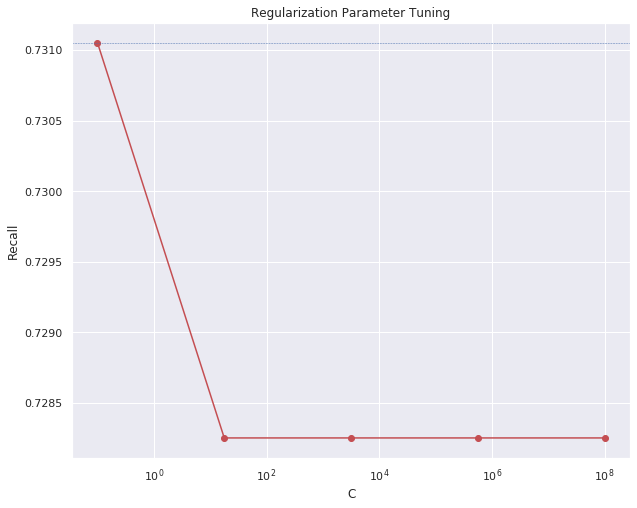

In [ ]:
score_C_1 = lr_pipe_grid.best_score_
sns.set()
plt.figure(figsize=(10,8))
plt.plot(Cs, scores, 'ro-')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Recall')
plt.title('Regularization Parameter Tuning')

# horizontal line -- model quality with default C value

plt.axhline(y=score_C_1, linewidth=.5, color='b', linestyle='dashed') 
plt.show()

In [ ]:
print ("Accuracy Score : ",accuracy_score(y_holdout, lr_pipe_grid.predict(X_holdout)) )
print ("Recall Score  ",recall_score(y_holdout, lr_pipe_grid.predict(X_holdout)))
print ("Precision Score  ",precision_score(y_holdout, lr_pipe_grid.predict(X_holdout)))

Accuracy Score :  0.7362689393939394
Recall Score   0.7362948960302458
Precision Score   0.7369914853358562


One way to improve our score is to use ensembling models. We will use RandomForests and then GBM

Accuracy of random forest classifier on test set: 0.81
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1054
           1       0.80      0.83      0.82      1058

    accuracy                           0.81      2112
   macro avg       0.82      0.81      0.81      2112
weighted avg       0.82      0.81      0.81      2112



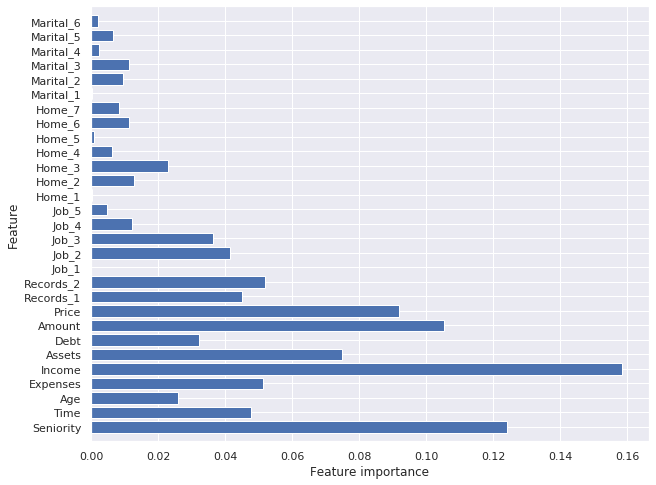

In [ ]:
# Create random forest classifer object that uses entropy
rfc = RandomForestClassifier(criterion='entropy', random_state=0, n_jobs=-1,n_estimators=200,max_depth=11)

# Train model
rfc_model = rfc.fit(X__train, y_train)
              
# Predict    
y_pred_rfc=rfc_model.predict(X_holdout)

print('Accuracy of random forest classifier on test set: {:.2f}'.format(rfc_model.score(X_holdout, y_holdout)))

print(classification_report(y_holdout,y_pred_rfc))

def plot_feature_importances(model):
    plt.figure(figsize=(10,8))
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(rfc_model)

Accuracy of GBM classifier on test set: 0.86
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1054
           1       0.83      0.91      0.87      1058

    accuracy                           0.86      2112
   macro avg       0.87      0.86      0.86      2112
weighted avg       0.87      0.86      0.86      2112



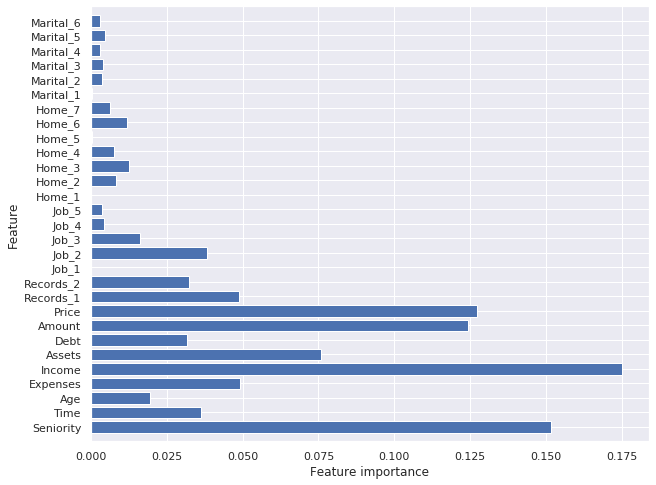

In [ ]:
# GBM
gbc_clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=8, random_state=42)

# Train model
gbc_clf_model = gbc_clf.fit(X__train, y_train)
              
# Predict    
y_pred_gbc_clf=gbc_clf_model.predict(X_holdout)

print('Accuracy of GBM classifier on test set: {:.2f}'.format(gbc_clf_model.score(X_holdout, y_holdout)))

print(classification_report(y_holdout,y_pred_gbc_clf))

plot_feature_importances(gbc_clf)

**Conclusion:** As you can see that, Recall has INCREASED to over 80% in case of Random Forest by Resampling the data.This is a huge achievement in the case of GBM shown recall of 90% and Accuracy of 86%. Also performance of Logistic Regression got better after resampling process to Accuracy of 73% and Recall of 73%. The important variables are Income, Seniority, price and Amount